# **Banco Central PBI**

In [51]:
import pandas as pd
import numpy as np
import time
import requests
import re
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
url='https://estadisticas.bcrp.gob.pe/estadisticas/series/trimestrales/resultados/PN39868FQ/html'
r=requests.get(url)
html_content=r.text
print(html_content)

<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="es" lang="es">
<head>
<meta http-equiv="X-UA-Compatible" content="IE=edge" />
<meta name="viewport" content="width=device-width, initial-scale=1.0"> 

<meta http-equiv="Content-Type" content="text/html;charset=utf-8" />
<script> if(top == self) { document.documentElement.style.display='block'}
else { top.location = self.location; } </script>



<link href="/estadisticas/series/css/ajax_upload.css" media="screen" rel="stylesheet" type="text/css" />
<link href="/estadisticas/series/css/jquery-1.7.2.css" media="screen" rel="stylesheet" type="text/css" />



<link href="/estadisticas/series/css/series-estadisticas.css?20231219233052" media="screen" rel="stylesheet" type="text/css" />
<link href="/estadisticas/series/css/estilo.css?20231219233052" media="screen" rel="stylesheet" type="text/css" />

<!--[if lt IE 9]>
	<link href="/estadisticas/series/css/series-estadisticas-ie.css" media="screen" rel="stylesheet" type="text/css" />
	<link 

In [53]:
html_soup=BeautifulSoup(html_content,'html.parser')
balanza=html_soup.find_all('table',class_='series')
columnas=['Fecha','Flujos macroeconómicos (porcentaje del PBI)']
df=pd.DataFrame(columns=columnas)
df.head()

,Fecha,Flujos macroeconómicos (porcentaje del PBI)


In [54]:
import re

for table in balanza:
    for row in table.find_all('tr')[1:]:
        values = []
        for col in row.find_all(['th', 'td']):
            # Limpiar el valor eliminando los caracteres "\n" y espacios adicionales
            cleaned_value = re.sub(r'\n+', ' ', col.text.strip())
            values.append(cleaned_value)
            if len(values) == len(columnas):
                df.loc[len(df)] = values
df.head()

,Fecha,Flujos macroeconómicos (porcentaje del PBI)
0,T112,2.6
1,T212,2.2
2,T312,2.4
3,T412,2.0
4,T113,2.2


In [55]:
df['Fecha']=df['Fecha'].str.replace('\n','')
df['Flujos macroeconómicos (porcentaje del PBI)']=df['Flujos macroeconómicos (porcentaje del PBI)'].str.replace('\n','')
df.head()

,Fecha,Flujos macroeconómicos (porcentaje del PBI)
0,T112,2.6
1,T212,2.2
2,T312,2.4
3,T412,2.0
4,T113,2.2


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, 0 to 45
Data columns (total 2 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Fecha                                        46 non-null     object
 1   Flujos macroeconómicos (porcentaje del PBI)  46 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


In [57]:
df['Flujos macroeconómicos (porcentaje del PBI)']=pd.to_numeric(df['Flujos macroeconómicos (porcentaje del PBI)'],
                                                                errors='coerce')
df.head()

,Fecha,Flujos macroeconómicos (porcentaje del PBI)
0,T112,2.6
1,T212,2.2
2,T312,2.4
3,T412,2.0
4,T113,2.2


In [58]:
df.head(8)

,Fecha,Flujos macroeconómicos (porcentaje del PBI)
0,T112,2.6
1,T212,2.2
2,T312,2.4
3,T412,2.0
4,T113,2.2
5,T213,2.2
6,T313,2.2
7,T413,2.3


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, 0 to 45
Data columns (total 2 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Fecha                                        46 non-null     object 
 1   Flujos macroeconómicos (porcentaje del PBI)  46 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


In [60]:
# Extraer trimestre y año y convertir la columna 'Fecha' a formato de fecha
df['Trimestre'] = df['Fecha'].str[1]
df['Año'] = '20' + df['Fecha'].str[2:]

In [61]:
# Crear la columna 'Fecha' con el formato deseado
df['Fecha'] = pd.to_datetime(df['Año'] + df['Trimestre'], format='%Y%m')
df.head()

,Fecha,Flujos macroeconómicos (porcentaje del PBI),Trimestre,Año
0,2012-01-01,2.6,1,2012
1,2012-02-01,2.2,2,2012
2,2012-03-01,2.4,3,2012
3,2012-04-01,2.0,4,2012
4,2013-01-01,2.2,1,2013


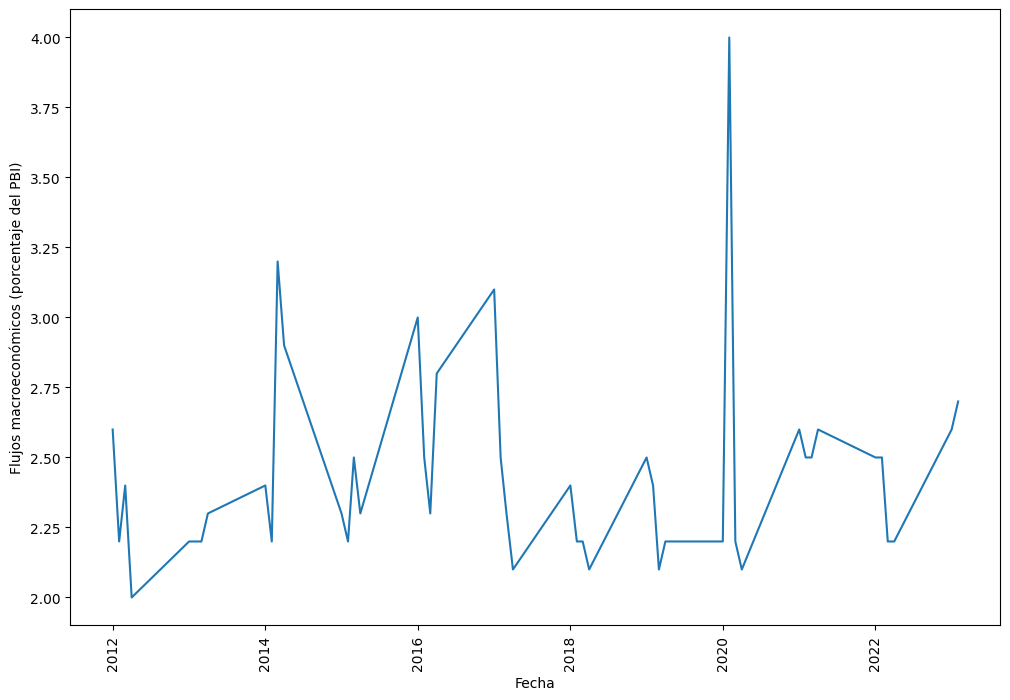

In [63]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df,x='Fecha',y='Flujos macroeconómicos (porcentaje del PBI)')
plt.xticks(rotation='vertical')
plt.show()